# Proceso estándar de regresión

1. Separar datos de entrenamiento / prueba
2. Normalizar datos / Crear un normalizador
3. Crear modelo (NN)
4. Entrenar
5. Evaluar resultados

In [ ]:
# Tratamos de predecir consumo de combustible (en galones) de un vehiculo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Red neuronal secuencial
from tensorflow.keras.models import Sequential
# Capa completamente conectada
from tensorflow.keras.layers import Dense, Normalization
# Optimizador
from tensorflow.keras.optimizers import Adam

In [2]:
# asegurar que los resultados sean "reproducibles"
import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)

### Datos de entrenamiento / prueba

In [3]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [6]:
X_train

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,4,90.0,75.0,2125.0,14.5,74,0,0,1
1,4,140.0,88.0,2890.0,17.3,79,0,0,1
2,8,350.0,160.0,4456.0,13.5,72,0,0,1
3,4,105.0,63.0,2125.0,14.7,82,0,0,1
4,4,97.0,67.0,2145.0,18.0,80,0,1,0
...,...,...,...,...,...,...,...,...,...
309,6,200.0,85.0,2990.0,18.2,79,0,0,1
310,8,400.0,180.0,4220.0,11.1,77,0,0,1
311,4,108.0,93.0,2391.0,15.5,74,0,1,0
312,4,83.0,61.0,2003.0,19.0,74,0,1,0


### Normalización

In [4]:
def crear_normalizador(datos):
    normalizer = Normalization(axis=-1)
    normalizer.adapt(np.array(datos))
    return normalizer

In [5]:
normalizador = crear_normalizador(X_train)

2022-08-29 19:18:43.544415: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Creación Red Neuronal

In [23]:
def crear_nn_regresion(norm):
    model = Sequential([
        normalizador,
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(loss='mean_absolute_error', optimizer=Adam(0.001))
    return model

In [24]:
nn = crear_nn_regresion(normalizador)

### Entrenamiento del modelo

In [13]:
history = nn.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0,
    epochs=100
)

### Evaluar el rendimiento del modelo

In [14]:
nn.evaluate(X_test, y_test, verbose=0)

1.8119354248046875

In [15]:
# Creación de predicciones
y_pred = nn.predict(X_test).flatten()

3/3 [==============================] - 0s 924us/step


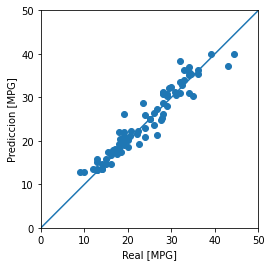

In [16]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('Real [MPG]')
plt.ylabel('Prediccion [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)